In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

%matplotlib inline

In [6]:
image = cv2.imread("/home/bot/dev/projects_data/kandovan/1010/cropped_img.png")

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

print(image.shape)
print(gray.shape)


(480, 640, 3)
(480, 640)


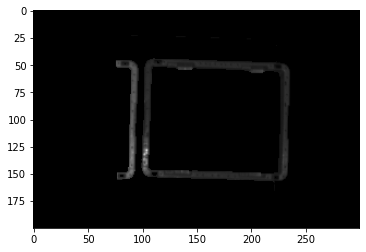

In [15]:
roi = gray[100:300, 250:550]
plt.imshow(roi, cmap='gray')

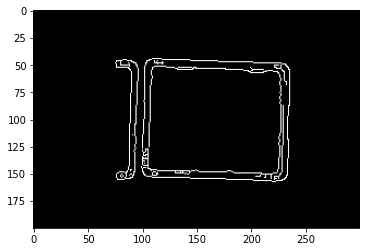

In [23]:
cc = cv2.Canny(roi, 50, 150)
plt.imshow(cc, cmap='gray')

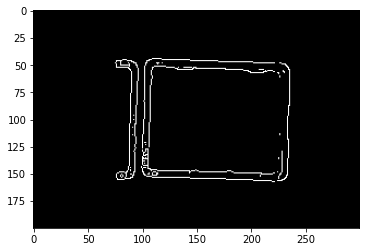

In [43]:
tight = cv2.Canny(roi, 100, 120)
plt.imshow(tight, cmap='gray')

In [60]:
def get_contours_image(img):
    contours, hierarchy = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    contours_image = np.copy(img)
    contours_image = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
    contours_image = cv2.drawContours(contours_image, contours, -1, (0,255,0), 1)

    return contours, contours_image

In [62]:
def get_box_image(img, contour):
    x,y,w,h = cv2.boundingRect(contour)
    box_image = np.copy(img)
    box_image = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
    box_image = cv2.rectangle(box_image, (x,y), (x+w, y+h), (200,0,200), 2)
    return box_image

(Text(0.5, 1.0, 'max c'), <matplotlib.image.AxesImage at 0x7fe95106a438>)

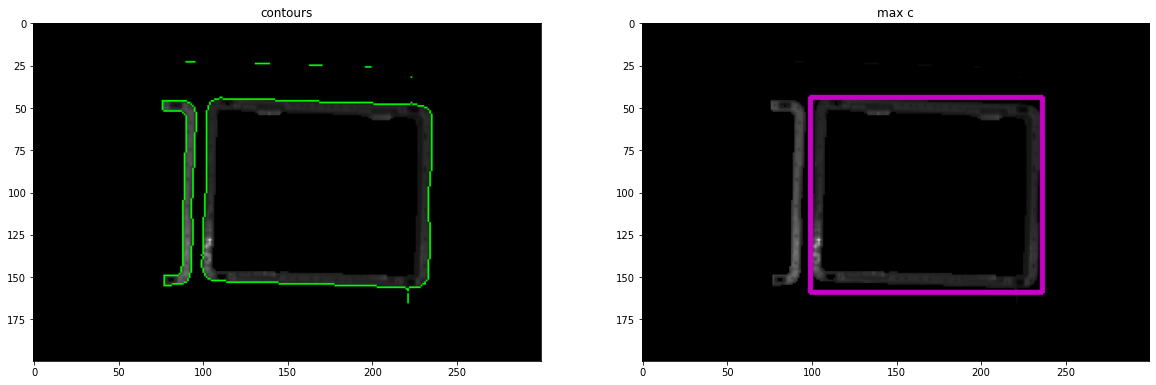

In [66]:
contours, contours_img = get_contours_image(roi)

cntsSorted = sorted(contours, key=lambda x: cv2.contourArea(x))

box_img = get_box_image(roi, cntsSorted[-1])

f, (ax1, ax2) = plt.subplots(1,2, figsize=(20,10))
ax1.set_title('contours'), ax1.imshow(contours_img)
ax2.set_title('max c'), ax2.imshow(box_img)

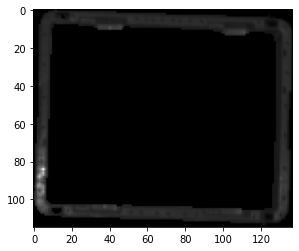

In [69]:
x,y,w,h = cv2.boundingRect(cntsSorted[-1])
bounding = roi[y:y+h, x:x+w]
plt.imshow(bounding, cmap='gray')

In [72]:
minRect = cv2.minAreaRect(cntsSorted[-1])
print(minRect)

((167.8204345703125, 100.5877914428711), (111.00146484375, 134.98654174804688), -87.9786376953125)


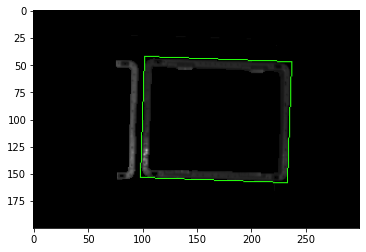

In [76]:
box = np.int0(cv2.boxPoints(minRect))
rotated_box_img = np.copy(roi)
rotated_box_img = cv2.cvtColor(rotated_box_img, cv2.COLOR_GRAY2RGB)
cv2.polylines(rotated_box_img, [box], True, (36,255,12), 1)
plt.imshow(rotated_box_img, cmap='gray')